In [ ]:
import numpy as np # Работа с массивами данных
import pandas as pd # Работа с табличными данными
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop # Оптимизаторы
from tensorflow.keras.preprocessing.text import Tokenizer # Токенизатор для преобразование текстов в последовательности
from sklearn.preprocessing import StandardScaler # Масштабирование данных
import gdown # Загрузка датасетов из облака google
import re # Регулярные выражения
import matplotlib.pyplot as plt # Отрисовка графиков
from sklearn.metrics import mean_squared_error, mean_absolute_error # Метрики для расчета ошибок
%matplotlib inline
import time

In [ ]:
# Подключить Google диск
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
       

Mounted at /content/drive


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/OneGA/t1_20220101_20220726_rg_201589066.csv', index_col=0)
len(df_1)

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder                       # Импортируем модуль preprocessing в котором хранится LabelEncoder
label_encoder = preprocessing.LabelEncoder() 
df_1.info()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,39,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 361919 entries, 0 to 361918
Data columns (total 67 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0.1                     361919 non-null  int64  
 1   ym:s:bounce                      361919 non-null  int64  
 2   ym:s:browser                     361831 non-null  object 
 3   ym:s:browserCountry              267457 non-null  object 
 4   ym:s:browserLanguage             360842 non-null  object 
 5   ym:s:clientID                    361919 non-null  uint64 
 6   ym:s:cookieEnabled               361919 non-null  int64  
 7   ym:s:date                        361919 non-null  object 
 8   ym:s:deviceCategory              361919 non-null  int64  
 9   ym:s:endURL                      361919 non-null  object 
 10  ym:s:firstGCLID                  17407 non-null   object 
 11  ym:s:from                        19 non-null      object 
 12  ym

In [ ]:
y = df_1.iloc[:,13].astype(str).apply(str)    #target column
column_y = df_1.columns[13]
print(column_y)
print(y)

ym:s:goalsID
0                 []
1                 []
2                 []
3         [45605569]
4                 []
             ...    
361914    [45605569]
361915            []
361916            []
361917            []
361918            []
Name: ym:s:goalsID, Length: 361919, dtype: object


In [ ]:
y = y.str.contains('201589066').map({True: 1, False: 0}) # map each value in the column to 0 or 1
print(y.unique())

[0 1]


In [ ]:
# Список для Label_encoder
cols = ['ym:s:bounce', 'ym:s:browser', 'ym:s:browserCountry', 'ym:s:browserLanguage', 'ym:s:clientID', 
        'ym:s:cookieEnabled', 'ym:s:date', 'ym:s:deviceCategory', 'ym:s:endURL', 'ym:s:firstGCLID', 
        'ym:s:from', 'ym:s:goalsDateTime', 'ym:s:goalsID', 'ym:s:goalsPrice', 'ym:s:goalsSerialNumber', 
        'ym:s:hasGCLID', 'ym:s:impressionsProductCoupon', 'ym:s:ipAddress', 'ym:s:isNewUser', 'ym:s:javascriptEnabled', 
        'ym:s:lastAdvEngine', 'ym:s:lastClickBannerGroupName', 'ym:s:lastDirectBannerGroup', 'ym:s:lastDirectClickBanner', 'ym:s:lastDirectClickBannerName', 
        'ym:s:lastDirectClickOrder', 'ym:s:lastDirectClickOrderName', 'ym:s:lastDirectConditionType', 'ym:s:lastDirectPhraseOrCond', 'ym:s:lastDirectPlatform', 
        'ym:s:lastDirectPlatformType', 'ym:s:lastGCLID', 'ym:s:lastReferalSource', 'ym:s:lastSearchEngine', 'ym:s:lastSearchEngineRoot', 
        'ym:s:lastSignificantGCLID', 'ym:s:lastSocialNetwork', 'ym:s:lastSocialNetworkProfile', 'ym:s:lastTrafficSource', 'ym:s:mobilePhone', 
        'ym:s:networkType', 'ym:s:offlineCallFirstTimeCaller', 'ym:s:offlineCallHoldDuration', 'ym:s:offlineCallMissed', 'ym:s:offlineCallTag', 
        'ym:s:offlineCallTalkDuration', 'ym:s:offlineCallURL', 'ym:s:openstatAd', 'ym:s:openstatCampaign', 'ym:s:openstatService', 
        'ym:s:openstatSource', 'ym:s:pageViews', 'ym:s:referer', 'ym:s:regionCity', 'ym:s:screenHeight', 
        'ym:s:screenOrientation', 'ym:s:screenWidth', 'ym:s:startURL', 'ym:s:UTMCampaign', 'ym:s:UTMContent', 
        'ym:s:UTMMedium', 'ym:s:UTMSource', 'ym:s:UTMTerm', 'ym:s:visitDuration', 'ym:s:visitID', 
        'ym:s:watchIDs']

# numbers too big
col_big_nums = ['ym:s:endURL', 'ym:s:lastDirectPhraseOrCond','ym:s:startURL','ym:s:lastDirectClickOrderName','ym:s:lastClickBannerGroupName']

df_1 = df_1.drop(col_big_nums, axis=1)

cols_new = [x for x in cols if x not in col_big_nums] # drop big numbers

# отбрасываем ячейки которые долго обрабатываются label_encoder
cols_to_drop = ['ym:s:deviceCategory', 'ym:s:from', 'ym:s:lastSocialNetworkProfile', 'ym:s:openstatService', 'ym:s:openstatSource']

cols_new_1= [v for v in cols_new if v not in cols_to_drop] # drop big numbers


df_1 = df_1.drop(cols_to_drop, axis=1)




In [ ]:
#cols_without_dropped_items = [x for x in cols_new_1 if x not in drop_list] # drop columns

# присвоить значение первого элемента списка cols_without_dropped_items
## a_test_iteration = cols_without_dropped_items[0]
#a_test_iteration = temporary_list[0]

#print("Тестируемый столбец:", a_test_iteration)
#start_time = time.time()
#df_test_column = label_encoder.fit_transform(df_1[a_test_iteration])
#print("Получившиеся значения тестируемого столбца:", df_test_column)
#print("--- %s seconds ---" % (time.time() - start_time))
# добавить элемент a_test_iteration в список drop_list
#drop_list.append(a_test_iteration)
# вывести на печать список drop_list с комментарием что это "Список для отбрасывания"
#print("Список для отбрасывания:", drop_list)

#print("Остаток списка для тестирования:", cols_without_dropped_items)

In [ ]:
list_len = len(cols_new_1)
cols_list = list(range(0, list_len, 1))

for cols123 in cols_list:
  a123 = cols_new_1[cols123]
  df_1[a123]= label_encoder.fit_transform(df_1[a123])
  print(cols123)
  print(a123)

0
ym:s:bounce
1
ym:s:browser
2
ym:s:browserCountry
3
ym:s:browserLanguage
4
ym:s:clientID
5
ym:s:cookieEnabled
6
ym:s:date
7
ym:s:firstGCLID
8
ym:s:goalsDateTime
9
ym:s:goalsID
10
ym:s:goalsPrice
11
ym:s:goalsSerialNumber
12
ym:s:hasGCLID
13
ym:s:impressionsProductCoupon
14
ym:s:ipAddress
15
ym:s:isNewUser
16
ym:s:javascriptEnabled
17
ym:s:lastAdvEngine
18
ym:s:lastDirectBannerGroup
19
ym:s:lastDirectClickBanner
20
ym:s:lastDirectClickBannerName
21
ym:s:lastDirectClickOrder
22
ym:s:lastDirectConditionType
23
ym:s:lastDirectPlatform
24
ym:s:lastDirectPlatformType
25
ym:s:lastGCLID
26
ym:s:lastReferalSource
27
ym:s:lastSearchEngine
28
ym:s:lastSearchEngineRoot
29
ym:s:lastSignificantGCLID
30
ym:s:lastSocialNetwork
31
ym:s:lastTrafficSource
32
ym:s:mobilePhone
33
ym:s:networkType
34
ym:s:offlineCallFirstTimeCaller
35
ym:s:offlineCallHoldDuration
36
ym:s:offlineCallMissed
37
ym:s:offlineCallTag
38
ym:s:offlineCallTalkDuration
39
ym:s:offlineCallURL
40
ym:s:openstatAd
41
ym:s:openstatCampai

In [ ]:
df_1.head(2)

,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:firstGCLID,ym:s:goalsDateTime,...,ym:s:screenOrientation,ym:s:screenWidth,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
0,0,1,5,79,9,201300,1,156,9284,122583,...,2,1013,360,77047,22,89,8203,0,255429,237431
1,1,1,48,63,37,204479,1,159,9284,122583,...,1,59,216,76950,2,52,8203,0,260955,243337


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361919 entries, 0 to 361918
Data columns (total 57 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Unnamed: 0.1                     361919 non-null  int64
 1   ym:s:bounce                      361919 non-null  int64
 2   ym:s:browser                     361919 non-null  int64
 3   ym:s:browserCountry              361919 non-null  int64
 4   ym:s:browserLanguage             361919 non-null  int64
 5   ym:s:clientID                    361919 non-null  int64
 6   ym:s:cookieEnabled               361919 non-null  int64
 7   ym:s:date                        361919 non-null  int64
 8   ym:s:firstGCLID                  361919 non-null  int64
 9   ym:s:goalsDateTime               361919 non-null  int64
 10  ym:s:goalsID                     361919 non-null  int64
 11  ym:s:goalsPrice                  361919 non-null  int64
 12  ym:s:goalsSerialNumber        

# Продолжение

In [ ]:
df_1 = df_1.drop('ym:s:goalsID', axis=1)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361919 entries, 0 to 361918
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Unnamed: 0.1                     361919 non-null  int64
 1   ym:s:bounce                      361919 non-null  int64
 2   ym:s:browser                     361919 non-null  int64
 3   ym:s:browserCountry              361919 non-null  int64
 4   ym:s:browserLanguage             361919 non-null  int64
 5   ym:s:clientID                    361919 non-null  int64
 6   ym:s:cookieEnabled               361919 non-null  int64
 7   ym:s:date                        361919 non-null  int64
 8   ym:s:firstGCLID                  361919 non-null  int64
 9   ym:s:goalsDateTime               361919 non-null  int64
 10  ym:s:goalsPrice                  361919 non-null  int64
 11  ym:s:goalsSerialNumber           361919 non-null  int64
 12  ym:s:hasGCLID                 

In [ ]:
#x_1 = df_1.iloc[:,0:10]
#z_1 = df_1.iloc[:,11:33] 
#X = pd.concat([x_1, z_1], axis=1)
X = df_1

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                           Specs         Score
9             ym:s:goalsDateTime  2.358033e+07
55                 ym:s:watchIDs  1.721628e+06
53            ym:s:visitDuration  1.226873e+06
54                  ym:s:visitID  9.669651e+05
43                  ym:s:referer  7.916463e+05
11        ym:s:goalsSerialNumber  7.104117e+05
5                  ym:s:clientID  5.893988e+05
49               ym:s:UTMContent  3.037005e+05
38  ym:s:offlineCallTalkDuration  2.347605e+05
23       ym:s:lastDirectPlatform  1.792834e+05
52                  ym:s:UTMTerm  1.584093e+05
19    ym:s:lastDirectClickBanner  1.298668e+05
37           ym:s:offlineCallTag  1.049719e+05
35  ym:s:offlineCallHoldDuration  9.306679e+04
39           ym:s:offlineCallURL  6.158504e+04
26        ym:s:lastReferalSource  3.467127e+04
36        ym:s:offlineCallMissed  2.351056e+04
18    ym:s:lastDirectBannerGroup  2.062995e+04
47              ym:s:screenWidth  1.488906e+04
29     ym:s:lastSignificantGCLID  1.318385e+04


In [ ]:
#X.to_csv('/content/drive/My Drive/X.csv')
#y.to_csv('/content/drive/My Drive/y.csv')

[5.50765373e-03 3.36556690e-03 4.71718136e-03 3.89227457e-03
 1.37218171e-03 7.02108913e-03 3.41331710e-07 7.32673139e-03
 1.80265067e-03 1.23284710e-02 9.45410214e-02 2.69133641e-01
 1.24286045e-03 0.00000000e+00 5.19588783e-03 4.97655624e-03
 0.00000000e+00 2.71561974e-03 2.25918030e-03 3.01277395e-03
 2.93442877e-03 2.27799444e-03 1.52885204e-03 2.15182252e-03
 2.30826909e-03 9.39538976e-04 3.65059943e-03 4.47963468e-03
 6.08081398e-03 1.28123274e-03 2.38835963e-04 2.81627164e-03
 3.89809632e-03 2.83650995e-03 9.12253384e-02 6.07354936e-02
 9.74629249e-02 6.80730499e-02 7.33067378e-02 6.66458677e-02
 0.00000000e+00 3.65659050e-08 8.62480222e-03 4.16813242e-03
 4.82934916e-03 5.46788734e-03 2.75447533e-03 5.62758323e-03
 4.26622078e-03 3.64842681e-03 4.40904306e-03 3.39228081e-03
 3.27453871e-03 6.56387621e-03 9.18440043e-03 8.50495112e-03]


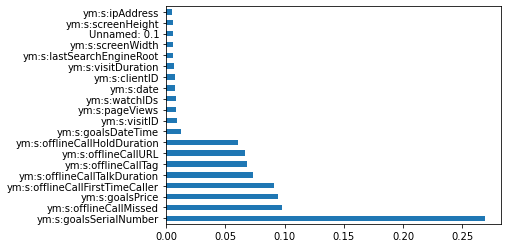

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

In [ ]:
# отбрасываем ячейки со слишком большой кореляцией
cols_2_to_drop = ['ym:s:goalsSerialNumber']

X = X.drop(cols_2_to_drop, axis=1)

KeyError: ignored

In [ ]:
x_train = X
y_train = y

print(x_train.shape)
print(y_train.shape)

(361919, 55)
(361919,)


[5.39279966e-03 3.54536311e-03 4.70689831e-03 3.89349902e-03
 1.55692701e-03 5.96557924e-03 6.22691760e-06 7.10428962e-03
 1.83571947e-03 1.37309457e-02 1.58541971e-01 1.09972017e-03
 0.00000000e+00 5.21270314e-03 4.53688848e-03 0.00000000e+00
 2.53500692e-03 2.18048674e-03 2.61981508e-03 2.98538653e-03
 2.47488532e-03 1.46886306e-03 2.00030376e-03 1.94050509e-03
 9.68560386e-04 3.61997860e-03 3.80988182e-03 4.44011643e-03
 1.25649531e-03 2.57544331e-04 2.29910111e-03 3.48483979e-03
 2.66836885e-03 1.10816804e-01 8.58999475e-02 1.69974211e-01
 1.03819206e-01 9.91092567e-02 1.02204360e-01 0.00000000e+00
 0.00000000e+00 9.53945731e-03 4.19280458e-03 4.88370637e-03
 5.70744809e-03 2.99800561e-03 4.99545524e-03 4.22862671e-03
 3.57855435e-03 3.38623252e-03 3.03213189e-03 3.15302968e-03
 6.82168641e-03 7.12541807e-03 6.39398793e-03]


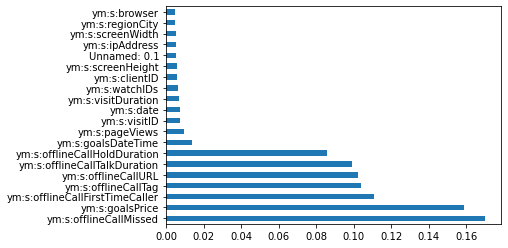

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

In [ ]:
top_20_features = feat_importances.nlargest(20).index.tolist()
print(top_20_features)

['ym:s:offlineCallMissed', 'ym:s:goalsPrice', 'ym:s:offlineCallFirstTimeCaller', 'ym:s:offlineCallTag', 'ym:s:offlineCallURL', 'ym:s:offlineCallTalkDuration', 'ym:s:offlineCallHoldDuration', 'ym:s:goalsDateTime', 'ym:s:pageViews', 'ym:s:visitID', 'ym:s:date', 'ym:s:visitDuration', 'ym:s:watchIDs', 'ym:s:clientID', 'ym:s:screenHeight', 'Unnamed: 0.1', 'ym:s:ipAddress', 'ym:s:screenWidth', 'ym:s:regionCity', 'ym:s:browser']


In [ ]:
x_train = x_train.drop(columns=[col for col in x_train.columns if col not in top_20_features])
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361919 entries, 0 to 361918
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Unnamed: 0.1                     361919 non-null  int64
 1   ym:s:browser                     361919 non-null  int64
 2   ym:s:clientID                    361919 non-null  int64
 3   ym:s:date                        361919 non-null  int64
 4   ym:s:goalsDateTime               361919 non-null  int64
 5   ym:s:goalsPrice                  361919 non-null  int64
 6   ym:s:ipAddress                   361919 non-null  int64
 7   ym:s:offlineCallFirstTimeCaller  361919 non-null  int64
 8   ym:s:offlineCallHoldDuration     361919 non-null  int64
 9   ym:s:offlineCallMissed           361919 non-null  int64
 10  ym:s:offlineCallTag              361919 non-null  int64
 11  ym:s:offlineCallTalkDuration     361919 non-null  int64
 12  ym:s:offlineCallURL           

In [ ]:
display(x_train)

,Unnamed: 0.1,ym:s:browser,ym:s:clientID,ym:s:date,ym:s:goalsDateTime,ym:s:goalsPrice,ym:s:ipAddress,ym:s:offlineCallFirstTimeCaller,ym:s:offlineCallHoldDuration,ym:s:offlineCallMissed,ym:s:offlineCallTag,ym:s:offlineCallTalkDuration,ym:s:offlineCallURL,ym:s:pageViews,ym:s:regionCity,ym:s:screenHeight,ym:s:screenWidth,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
0,0,5,201300,156,122583,30,6537,181,537,88,810,1420,455,0,782,767,1013,0,255429,237431
1,1,48,204479,159,122583,30,13124,181,537,88,810,1420,455,0,702,467,59,0,260955,243337
2,2,36,220170,175,122583,30,36409,181,537,88,810,1420,455,0,702,354,70,0,286721,272694
3,3,6,11196,80,51948,29,46153,159,389,76,611,984,338,1,702,498,59,63,100846,30784
4,4,36,205018,159,122583,30,13347,181,537,88,810,1420,455,0,1288,531,84,0,261762,244153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361914,70461,37,242272,8,3864,29,5252,159,389,76,611,984,338,2,702,556,106,222,338244,95150
361915,70462,6,138536,112,122583,30,47394,181,537,88,810,1420,455,0,521,407,59,0,172302,147920
361916,70463,6,71061,37,122583,30,4227,181,537,88,810,1420,455,0,702,386,87,8,29313,309590
361917,70464,23,178885,134,122583,30,46155,181,537,88,810,1420,455,0,1288,103,429,15,217320,195826


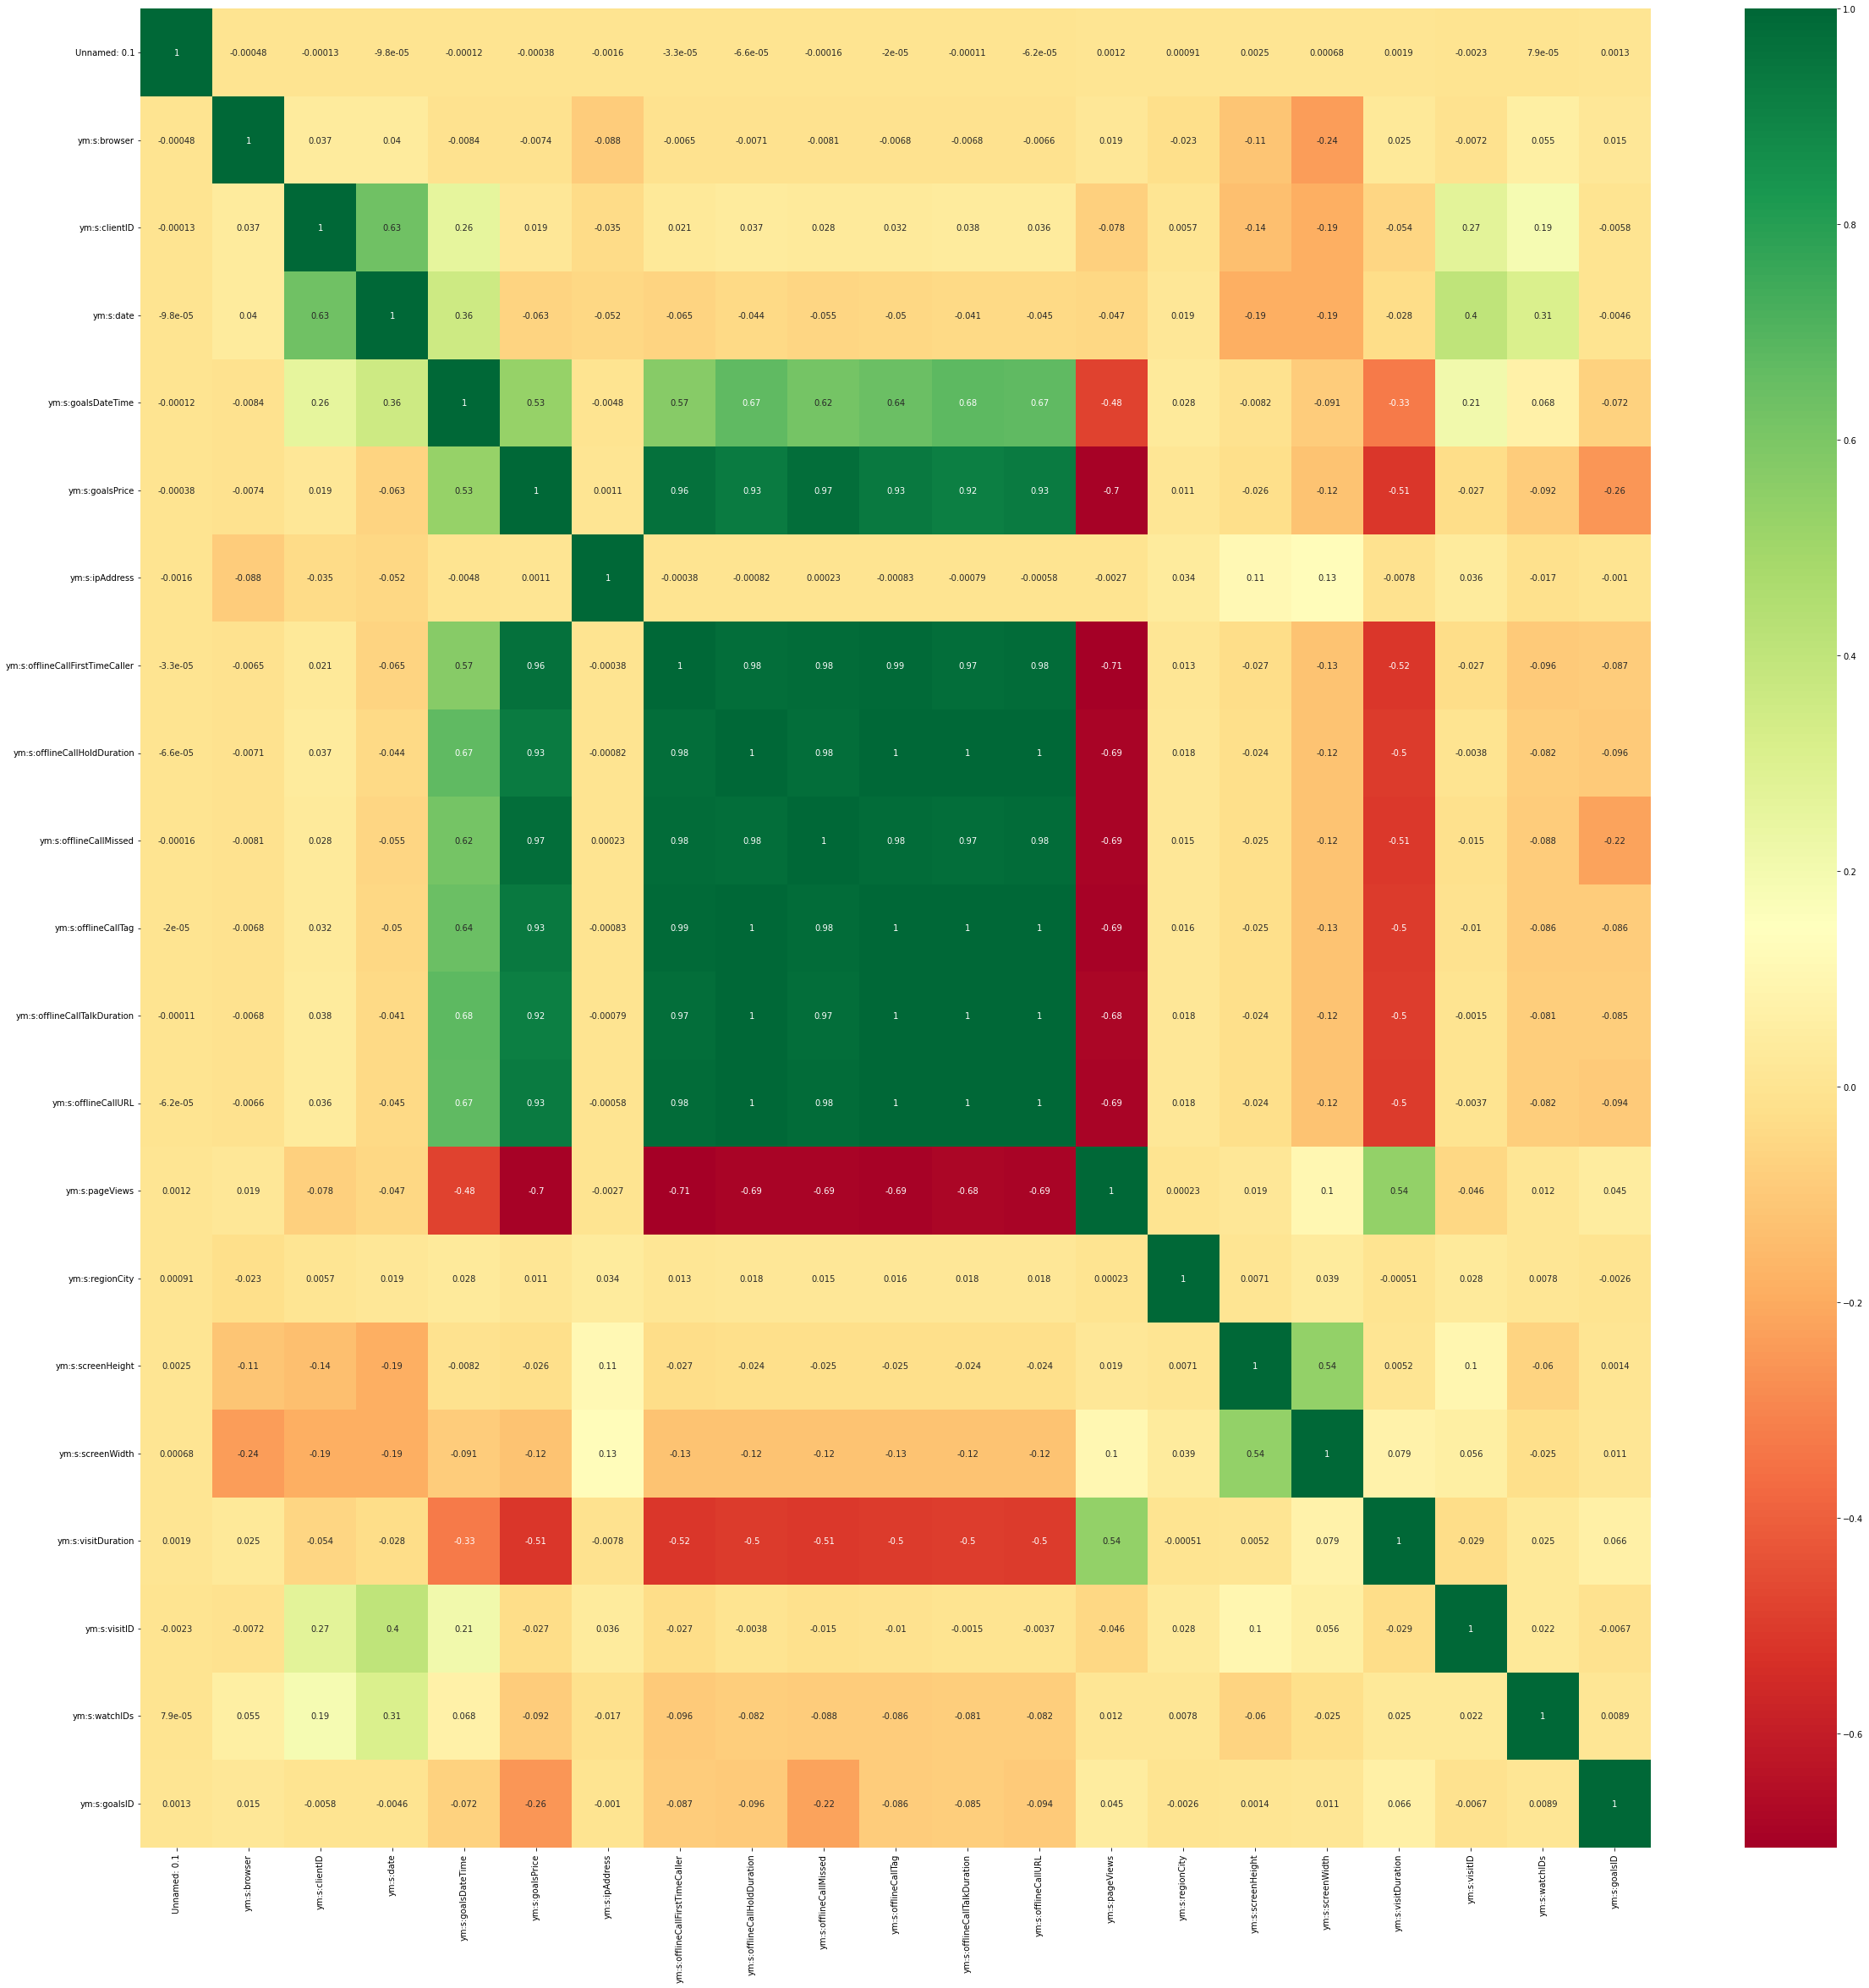

In [ ]:
#corrmat = data.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
##plot heat map
#g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

import seaborn as sns
#get correlations of each features in dataset
x_train_for_heatmap = pd.concat([x_train, y_train], axis=1)

corrmat = x_train_for_heatmap.corr()

#corrmat_df = pd.DataFrame(corrmat, index=x_train.columns, columns=feat_importances)
#display(corrmat_df)

top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(x_train_for_heatmap[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#cols_to_drop_after_heatmap = ['ym:s:goalsPrice', 'ym:s:offlineCallMissed']

#x_train = x_train.drop(cols_to_drop_after_heatmap, axis=1)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(361919, 20)
(361919,)


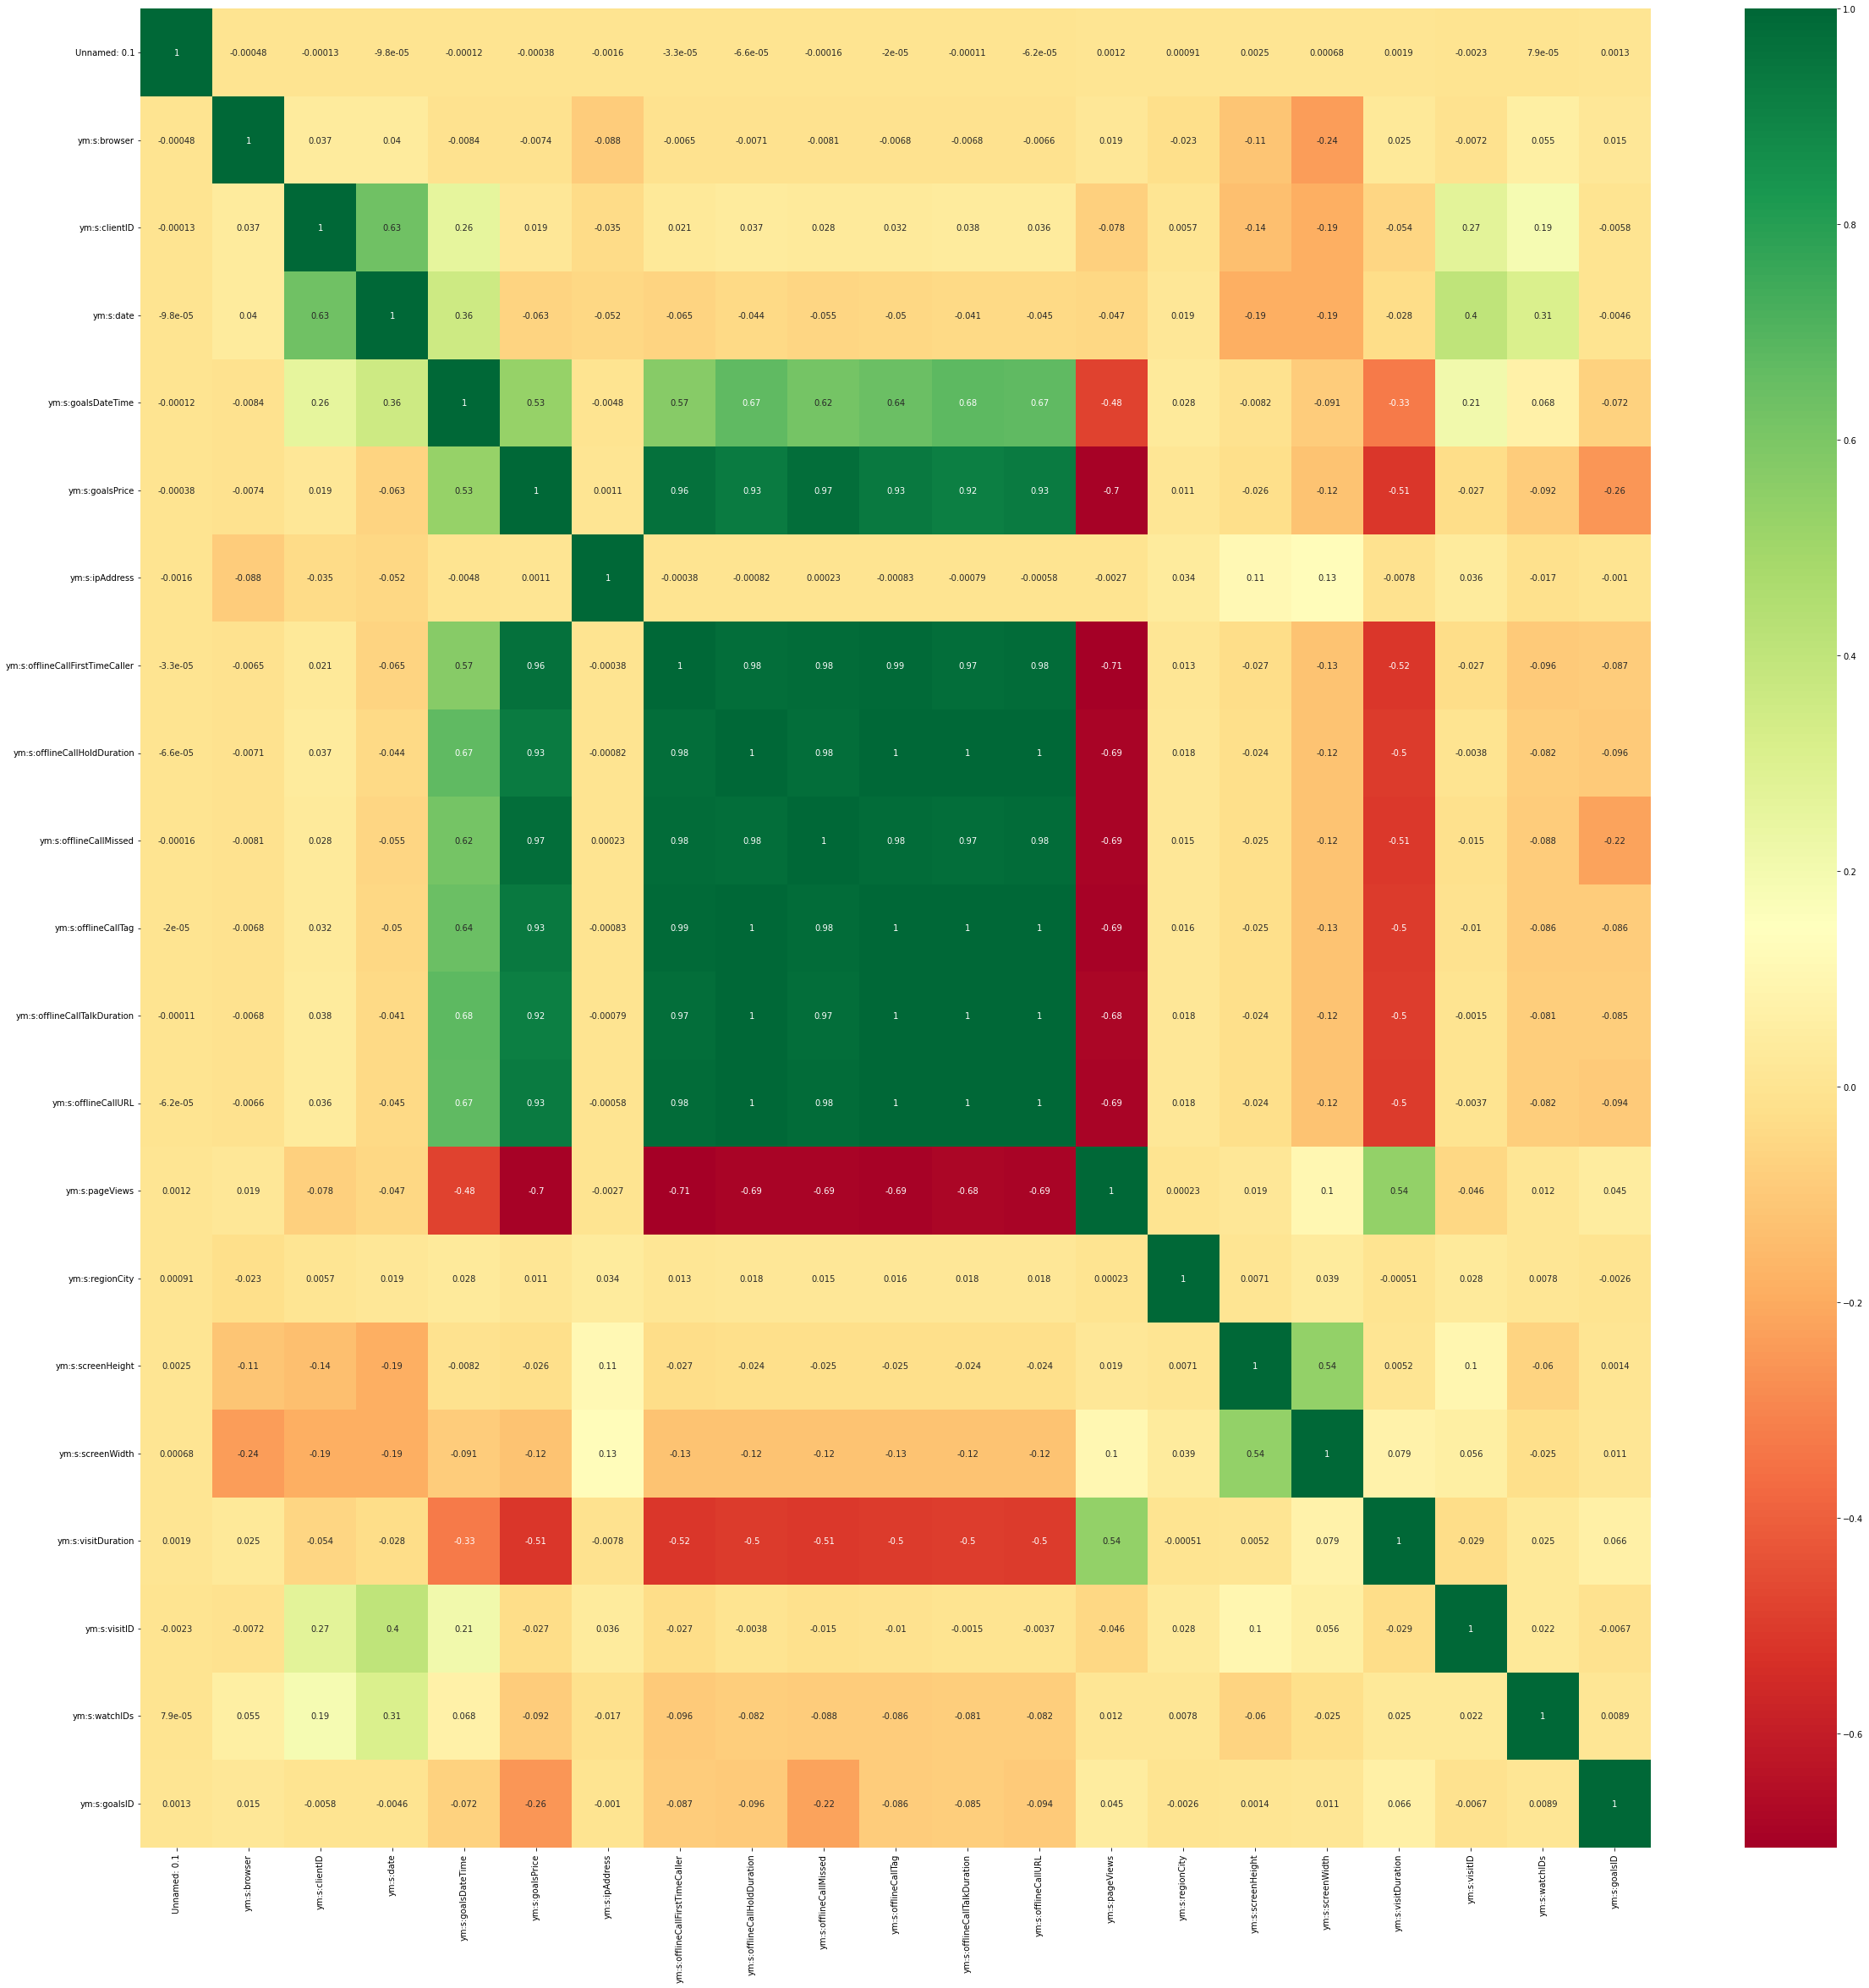

In [ ]:
#corrmat = data.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
##plot heat map
#g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

import seaborn as sns
#get correlations of each features in dataset
x_train_for_heatmap = pd.concat([x_train, y_train], axis=1)

corrmat = x_train_for_heatmap.corr()

#corrmat_df = pd.DataFrame(corrmat, index=x_train.columns, columns=feat_importances)
#display(corrmat_df)

top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(x_train_for_heatmap[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Создание Модели

In [ ]:
# Разделение данных на выборки
from sklearn.model_selection import train_test_split    

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, shuffle=True, test_size=0.2, random_state=42)
print('Размер x_train:',x_train.shape)                             
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

Размер x_train: (36191, 20)
Размер y_train: (36191,)
Размер x_test: (325728, 20)
Размер y_test: (325728,)


In [ ]:
x_train.to_csv('/content/drive/My Drive/x_train.csv')
y_train.to_csv('/content/drive/My Drive/y_train.csv')

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36191 entries, 122793 to 121958
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Unnamed: 0.1                     36191 non-null  int64
 1   ym:s:browser                     36191 non-null  int64
 2   ym:s:clientID                    36191 non-null  int64
 3   ym:s:date                        36191 non-null  int64
 4   ym:s:goalsDateTime               36191 non-null  int64
 5   ym:s:goalsPrice                  36191 non-null  int64
 6   ym:s:ipAddress                   36191 non-null  int64
 7   ym:s:offlineCallFirstTimeCaller  36191 non-null  int64
 8   ym:s:offlineCallHoldDuration     36191 non-null  int64
 9   ym:s:offlineCallMissed           36191 non-null  int64
 10  ym:s:offlineCallTag              36191 non-null  int64
 11  ym:s:offlineCallTalkDuration     36191 non-null  int64
 12  ym:s:offlineCallURL              36191 n

In [ ]:
CLASS_COUNT=2
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

print('Размер y_train:',y_train.shape)
print('Размер y_test:',y_test.shape)

Размер y_train: (36191, 2)
Размер y_test: (325728, 2)


In [ ]:
number_of_cols = x_train.shape[1]

#Создание Модели
model_1 = Sequential()                                            # Создание последовательной модели нейросети
model_1.add(Dense(1000, input_dim=number_of_cols, activation="relu"))  # Первый полносвязный слой
model_1.add(Dense(200, activation="relu"))
model_1.add(Dropout(0.1))
model_1.add(Dense(200, activation="relu"))
model_1.add(Dense(2, activation='sigmoid'))             # Выходной полносвязный слой

model_1.compile(optimizer='adam',                                 # Компиляция модели для обучения на данных вида Bag of Words
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Epoch 1/5
1131/1131 [==============================] - 53s 45ms/step - loss: 42.0848 - accuracy: 0.9924 - val_loss: 0.3155 - val_accuracy: 0.9964
Epoch 2/5
1131/1131 [==============================] - 36s 32ms/step - loss: 0.4505 - accuracy: 0.9960 - val_loss: 0.0703 - val_accuracy: 0.9964
Epoch 3/5
1131/1131 [==============================] - 51s 45ms/step - loss: 7.3359 - accuracy: 0.9942 - val_loss: 0.0999 - val_accuracy: 0.9964
Epoch 4/5
1131/1131 [==============================] - 51s 45ms/step - loss: 0.2706 - accuracy: 0.9961 - val_loss: 0.0384 - val_accuracy: 0.9964
Epoch 5/5
1131/1131 [==============================] - 38s 34ms/step - loss: 0.0496 - accuracy: 0.9962 - val_loss: 0.0239 - val_accuracy: 0.9964
Время обучения:  228.2448856830597
Total time taken: 228.2448856830597 seconds
0.996411144733429


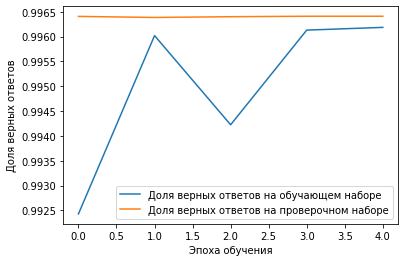

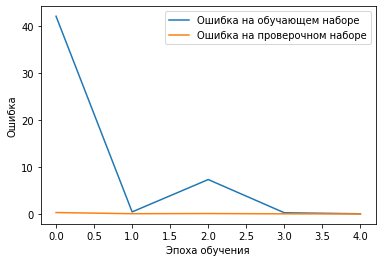

In [ ]:
import time
start_time = time.time() # счетчик времени
# Обучение сети с помощью функции fit()
history_1 = model_1.fit(x_train,                            # Обучающая выборка Bag of Words
                        y_train,                               # Метки классов обучающей выборки
                        epochs=5,                             # Количество эпох
                        batch_size=32,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_test, y_test))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history_1.history['val_accuracy'])) # print the highest accuracy achieved by the model


plt.plot(history_1.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_1.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history_1.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_1.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
x_train_df = pd.DataFrame(x_train)
x_train_df.to_csv('/content/drive/My Drive/x_train1.csv')
y_train_df = pd.DataFrame(y_train)
y_train_df.to_csv('/content/drive/My Drive/y_train1.csv')